#                  **McDonalds Market Segmentation (Code Conversion)**



# Importing Library

In [2]:
import pandas as pd
import numpy as np

In [4]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=c6698823cf47306b3b0d5bbb728b3b6763814d717168fccc42ca203753208835
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [5]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Data Exploration

In [6]:
mcd_data = pd.read_csv("mcdonalds.csv")
mcd_data_copy = pd.read_csv("mcdonalds.csv")
column_names = mcd_data.columns.values.tolist()
for column in column_names:
    print(column)

yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [7]:
shape = mcd_data.shape
print("Shape of the DataFrame:")
print(shape)

Shape of the DataFrame:
(1453, 15)


In [8]:
first_three_rows = mcd_data.head(3)
print("First 3 rows of the DataFrame:")
print(first_three_rows)

First 3 rows of the DataFrame:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [9]:
MD = mcd_data.iloc[:, 0:11].replace("Yes", 1).replace("No", 0)
mean = round(MD.mean(), 2)
print("Mean of each column:")
print(mean)

Mean of each column:
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


# Performing PCA

In [10]:
pca = PCA()
MD_pca = pca.fit_transform(MD)
pca.fit(MD)

SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_

index = []
for i in range(len(SD)):
    i = i + 1
    index.append("PC{}".format(i))

sum_result = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)

sum_result

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [18]:
print("Standard Deviation:\n", SD.round(1))

load =(pca.components_)
i = 0
rot_matrix =pca.components_.T

rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df = round(-rot_df, 3)

rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [17]:
print(rot_df)

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113  0.018   
spicy       0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003   
fast        0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166   
cheap       0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089 -0.370  0.729  0.211  0.027  0.167  0.072   

             PC10   PC11  
yummy       0.110 -0.045  
convenient  0.666  0.

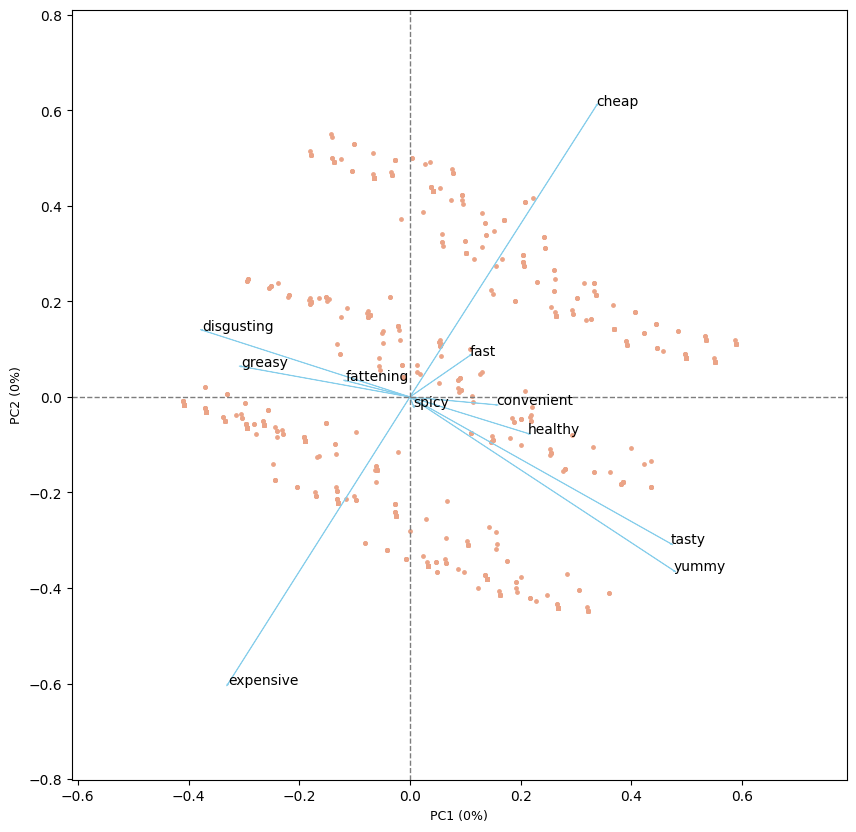

In [16]:
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

# Extracting Segments

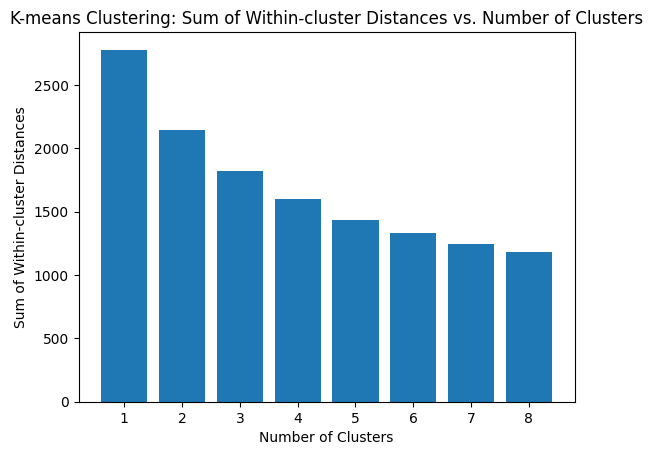

In [13]:
np.random.seed(1234)
data = pd.read_csv("mcdonalds.csv")
MD = data.iloc[:, 0:11].replace("Yes", 1).replace("No", 0)
# Number of repetitions for each cluster count
nrep = 10

# Range of cluster numbers to test
num_clusters = range(1, 9)
within_cluster_distances = []
cluster_models = {}

# Perform K-means clustering for different numbers of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append(kmeans.inertia_)
    cluster_models[str(k)] = kmeans

# Plotting the results
plt.bar(num_clusters, within_cluster_distances)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Within-cluster Distances")
plt.title("K-means Clustering: Sum of Within-cluster Distances vs. Number of Clusters")
plt.show()

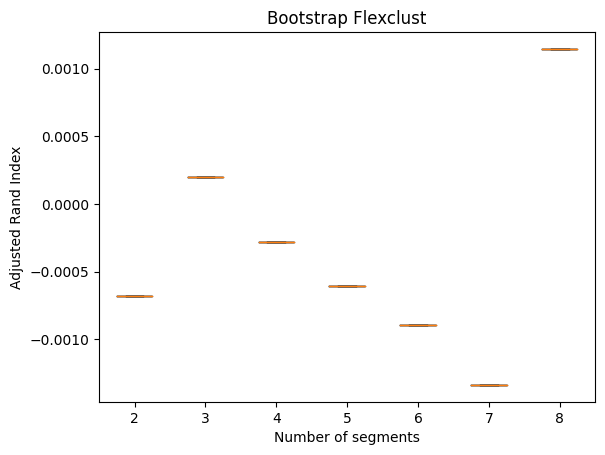

In [14]:
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

# Segment Similarity and Stability


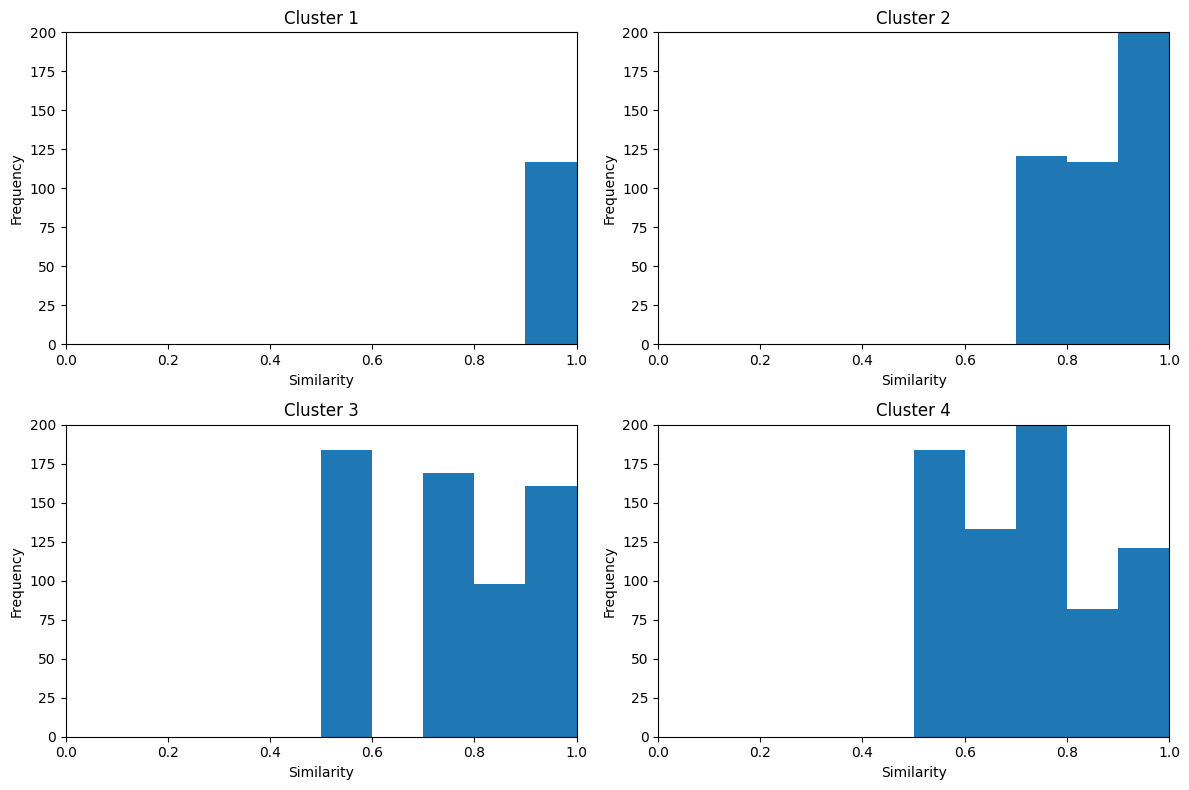

In [19]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx in range(1, 5):
    labels = cluster_models[str(idx)].predict(MD)
    similarities =cluster_models[str(idx)].transform(MD).min(axis=1)
    row = (idx - 1) // 2
    col = (idx - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(idx))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

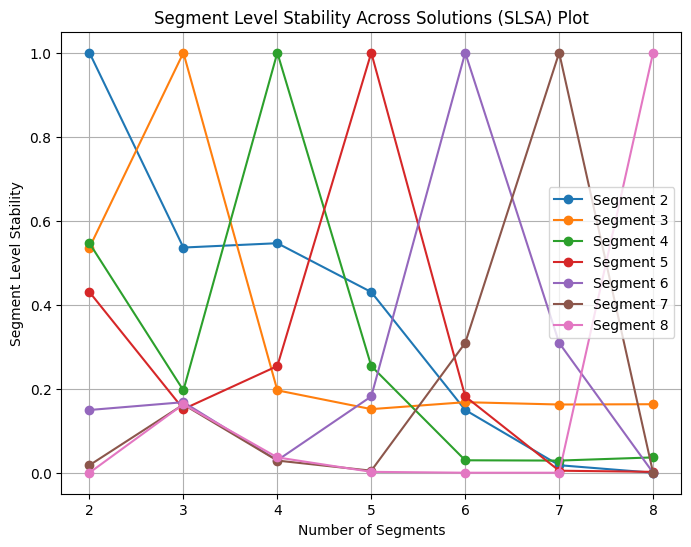

In [20]:
num_segments = range(2, 9)

# Calculate segment stability for each segment count
segment_stability = []
for segment in num_segments:
    labels_segment = cluster_models[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

# Plotting the Segment Level Stability Across Solutions (SLSA) plot
plt.figure(figsize=(8, 6))
for i, segment in enumerate(num_segments):
    stability_scores = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability_scores, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

In [21]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = cluster_models[segment].predict(MD)
    segment_similarities[segment] = cluster_models[segment].transform(MD).min(axis=1)

segment_labels

{'2': array([1, 0, 0, ..., 0, 0, 1], dtype=int32),
 '3': array([1, 0, 0, ..., 0, 2, 1], dtype=int32),
 '4': array([1, 3, 3, ..., 3, 0, 2], dtype=int32),
 '5': array([2, 3, 4, ..., 4, 0, 1], dtype=int32)}

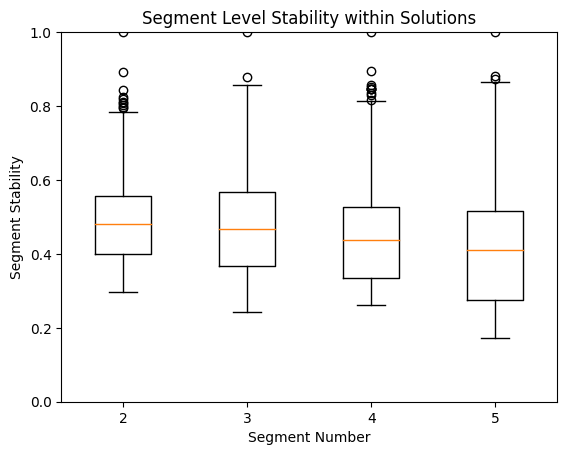

In [22]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = cluster_models[segment].predict(MD)
    segment_similarities[segment] = cluster_models[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

# Mixture Models and Summary

In [24]:
#mixing models
from scipy.stats import entropy
from sklearn.cluster import KMeans
np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234, n_init=10)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


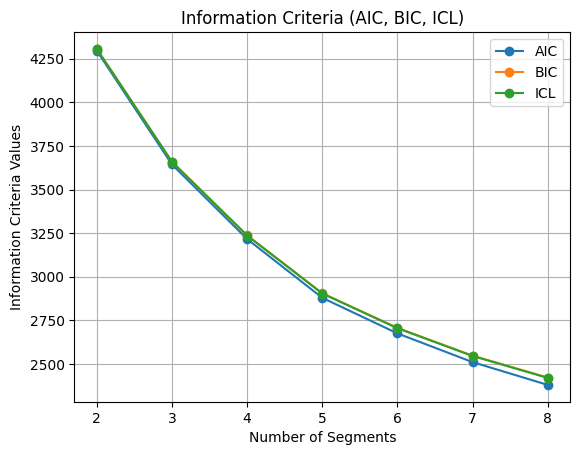

In [ ]:
segments = MD_m28["k"]
aic_scores = MD_m28["AIC"]
bic_scores = MD_m28["BIC"]
icl_scores = MD_m28["ICL"]

plt.plot(segments, aic_scores, marker='o', label='AIC')
plt.plot(segments, bic_scores, marker='o', label='BIC')
plt.plot(segments, icl_scores, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Information Criteria Values')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.mixture import GaussianMixture

num_clusters = 4
kmeans_model = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_model.fit(MD)
kmeans_labels = kmeans_model.predict(MD)

gmm_model = GaussianMixture(n_components=num_clusters, random_state=1234)
gmm_model.fit(MD)
gmm_labels = gmm_model.predict(MD)

clusters_df = pd.DataFrame({'kmeans': kmeans_labels, 'mixture': gmm_labels})

MD_subset = MD[clusters_df['mixture'] == 3]

kmeans_subset = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_subset.fit(MD_subset)
subset_labels = kmeans_subset.predict(MD_subset)

subset_clusters_df = pd.DataFrame({'kmeans': subset_labels, 'mixture': 3})

print(pd.crosstab(clusters_df['kmeans'], clusters_df['mixture']))
print(pd.crosstab(clusters_df['kmeans'], subset_clusters_df['kmeans']))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [ ]:
from sklearn.mixture import GaussianMixture

model_4a = GaussianMixture(n_components=4)
model_4a.fit(MD)

log_likelihood_4a = model_4a.score(MD)

model_4 = GaussianMixture(n_components=4)
model_4.fit(MD)

log_likelihood_4 = model_4.score(MD)

print("Log-likelihood for model_4a:", log_likelihood_4a)
print("Log-likelihood for model_4:", log_likelihood_4)


Log-likelihood for model_4a: 11.727872558164462
Log-likelihood for model_4: 11.151316714845965


In [38]:
like_counts = mcd_data['Like'].value_counts()
reversed_counts = like_counts[::-1]

print(reversed_counts)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [46]:
like_conversion = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like_numeric'] = data['Like'].map(like_conversion)

like_numeric_counts = data['Like_numeric'].value_counts()

print(like_numeric_counts)


Like_numeric
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices

independent_vars = data.columns[:11]
formula_str = 'Like ~ ' + ' + '.join(independent_vars)

response_matrix = dmatrices(formula_str, data=data)[1]

print(response_matrix)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [ ]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
import numpy as np

np.random.seed(1234)

# Assuming 'data' is your dataset
independent_vars = data.columns[:11]
formula_str = ' + '.join(independent_vars)

# Create the design matrix X
X = dmatrix(formula_str, data=data)

# Create the outcome matrix y
y = data['Like'].values.reshape(-1, 1)  # Assuming 'Like' is the outcome variable

num_components = 2
num_initializations = 10
verbose_output = False

model = GaussianMixture(n_components=num_components, n_init=num_initializations, verbose=verbose_output)
MD_reg2 = model.fit(X, y)

print(MD_reg2)

cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


# Profiling Segmennts

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

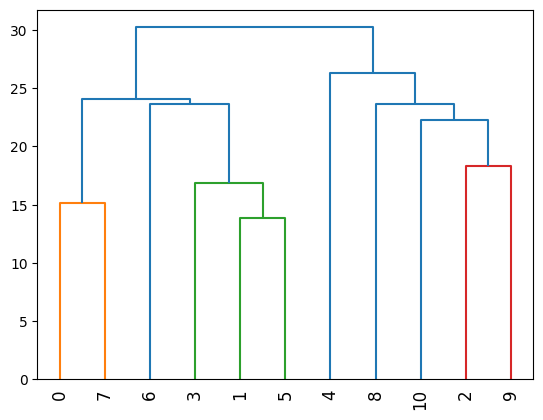

In [26]:
# heirarchial clustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

D = np.transpose(MD)
D = linkage(D, method = "average")
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

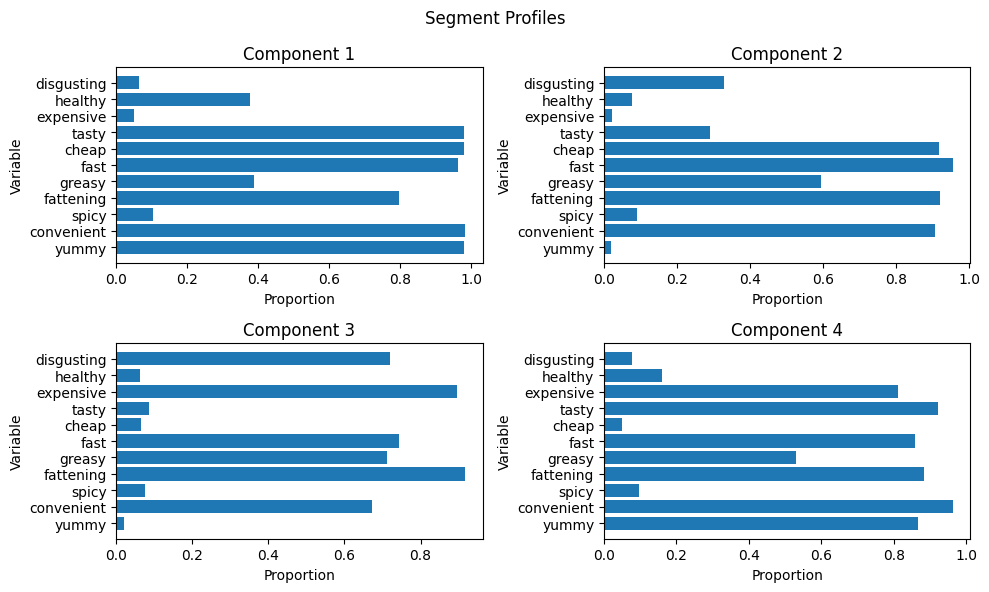

In [27]:
kmeans_model = cluster_models['4']
labels = kmeans_model.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
for i in range(4):
    axs[i // 2, i % 2].barh(range(MD_mean.shape[1]), MD_mean.iloc[i])
    axs[i // 2, i % 2].set_title(f'Component {i + 1}')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

fig.suptitle('Segment Profiles')
fig.tight_layout()

plt.show()


In [28]:
import seaborn as sns

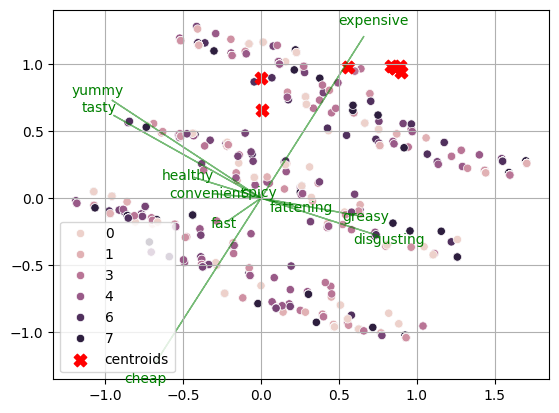

In [31]:
# showing the cluster solution
sns.scatterplot(data=mcd_data,x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

def plot_proj_axes(rot_matrix, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rot_matrix[i, 0]*2, rot_matrix[i, 1]*2, color='g', alpha=0.5)
        plt.text(rot_matrix[i, 0]*2.2, rot_matrix[i, 1]*2.2, label, color='g', ha='center', va='center')

feature_names = mcd_data.columns[:11]
plot_proj_axes(rot_matrix[:, :2], feature_names)

plt.legend()
plt.grid(True)
plt.show()

# Describing Segments

In [32]:
# segment description
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

df1=pd.read_csv("mcdonalds.csv")

def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = df1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])
df1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


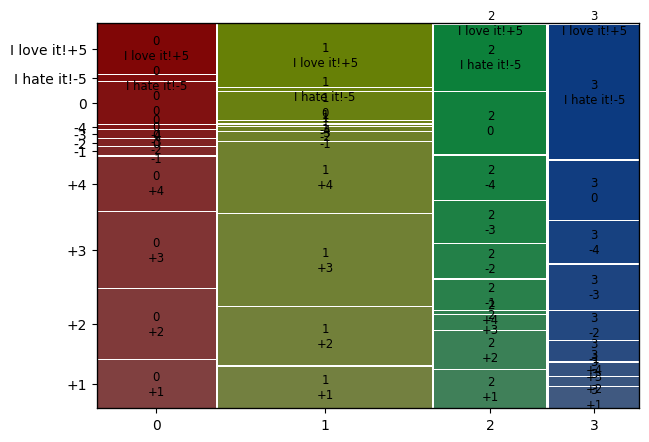

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Define categorical columns
cat_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting']

# Function for label encoding
def label_encode(column):
    data[column] = LabelEncoder().fit_transform(data[column])
    return data

# Apply label encoding to categorical columns
for col in cat_cols:
    label_encode(col)

# Select columns for clustering
df_eleven = data[cat_cols]

# Perform KMeans clustering
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Assign cluster labels to original data
data['cluster_num'] = kmeans_model.labels_

# Create crosstabulation
crosstab = pd.crosstab(data['cluster_num'], data['Like'])

# Reorder columns based on existing columns in crosstab
reordered_cols = crosstab.columns.tolist()

# Plot mosaic plot
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab[reordered_cols].stack())
plt.show()


In [34]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=cluster_models['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, mcd_data['Gender'])
ct

Gender,Female,Male
row_0,,
0,309,204
1,213,153
2,101,141
3,165,167


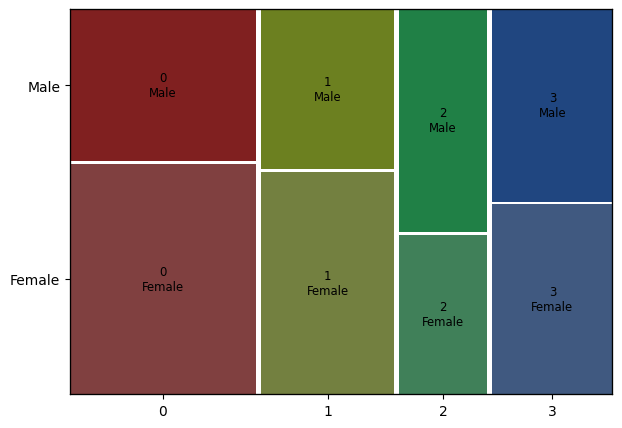

In [36]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4 = cluster_models['4']
k4 = MD_k4.labels_

# Creating a cross-tabulation between cluster labels and 'Gender'
ct = pd.crosstab(k4, mcd_data['Gender'])

# Plotting the mosaic plot
mosaic(ct.stack(), gap=0.01)

plt.show()


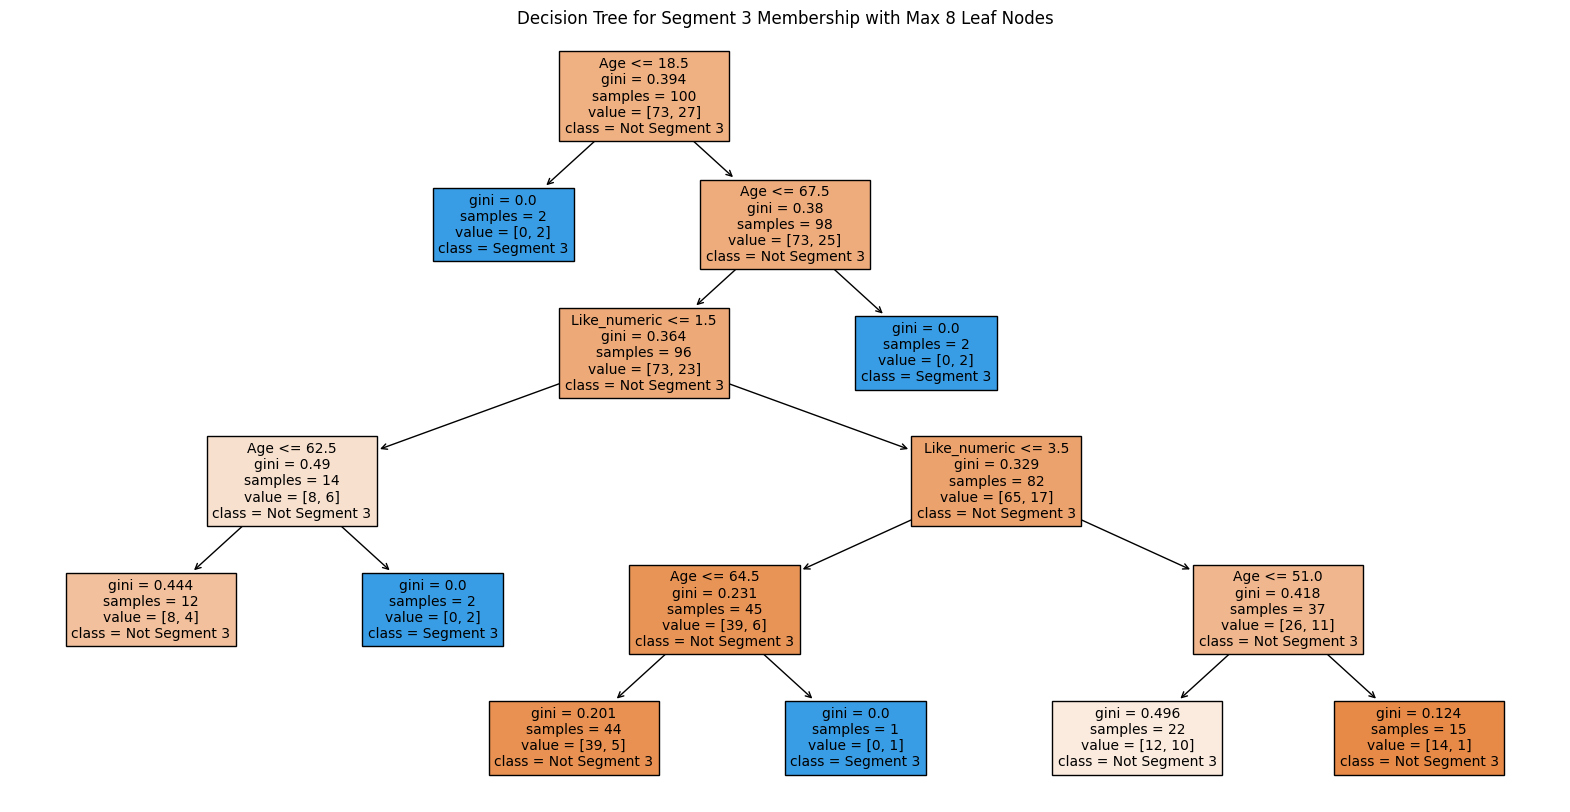

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Sample data creation for demonstration purposes
# Please replace this with your actual data
np.random.seed(1234)
data = pd.DataFrame({
    'Like_numeric': np.random.randint(1, 6, size=100),
    'Age': np.random.randint(18, 70, size=100),
    'k4': np.random.randint(0, 4, size=100)
})

# Introduce some NaN values for demonstration purposes
data.loc[::10, 'Age'] = np.nan

# Define feature matrix X and target vector y
X = data[['Like_numeric', 'Age']]
y = (data['k4'] == 3).astype(int)

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit the DecisionTreeClassifier with max_leaf_nodes set to 8
tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, random_state=1234)
tree.fit(X_imputed, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Increase the figure size for better visibility
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True, fontsize=10)
plt.title("Decision Tree for Segment 3 Membership with Max 8 Leaf Nodes")
plt.show()


# Selecting Target Segment

In [52]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [53]:
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [54]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [55]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


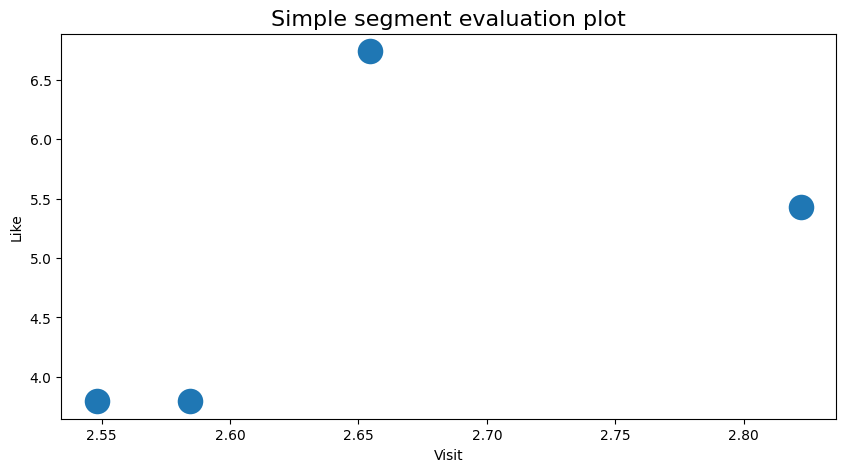

In [56]:
# segment evalutaion
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400)
plt.title("Simple segment evaluation plot",
          fontsize = 16)
plt.xlabel("Visit", fontsize = 10)
plt.ylabel("Like", fontsize = 10)
plt.show()